# Apéndice I

# Índice
## 1. Objetivo.
## 2. Missing values
## 2.1. Missing Data Heatmap
## 2.2. Missing Data Percentage List
## 3. Outliers (Datos fuera de rango)
## 3.1. Histograma /Box Plot
## 3.2. Bar Chart
## 4. Datos innecesarios
## 4.1. Tipo innecesario: Duplicados

# Mineria de datos dataset Covid-19
Se importá un conjunto de datos del Covid-19 y se realizán los pasos necesarios para analizar los datos.

# 1. Objetivo
Se realizara un pre-analisis de datos para validar la calidad de los datos a graficar.

In [3]:
# importamos los paquetes a utilizar
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

Leemos el fichero "COVID-19-geographic-disbtribution-worldwide.xlsx"

In [4]:
# Leemos datos
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx')

Comprobamos los tipos y la cantidad de instacias que tenemos

In [5]:
# Retornamos dimensiones DataFrame y tipos de datos por columna
print(df.shape)
print(df.dtypes)

(61900, 12)
dateRep                                                       datetime64[ns]
day                                                                    int64
month                                                                  int64
year                                                                   int64
cases                                                                  int64
deaths                                                                 int64
countriesAndTerritories                                               object
geoId                                                                 object
countryterritoryCode                                                  object
popData2019                                                          float64
continentExp                                                          object
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000           float64
dtype: object


Comprobamos de todas las variables, que subconjunto son númericas.

In [6]:
# Verificamos y mostramos columnas numericas
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['day' 'month' 'year' 'cases' 'deaths' 'popData2019'
 'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000']


Hacemos lo mismo con las variables que no son númericas

In [7]:
# Verificamos y mostramos columnas no numericas
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)


['dateRep' 'countriesAndTerritories' 'geoId' 'countryterritoryCode'
 'continentExp']


De estos resultados, aprendemos que el conjunto de datos tiene **61.900** filas y **12** columnas. También identificamos si las características son variables numéricas o categóricas. Todas ellas son información útil.
Ahora podemos revisar la lista de tipos de datos "sucios" y arreglarlos uno por uno.


# 2. Missing values

## 2.1. Missing Data Heatmap
Cuando hay un número menor de características, podemos visualizar los datos que faltan a través del mapa de calor.

<Axes: >

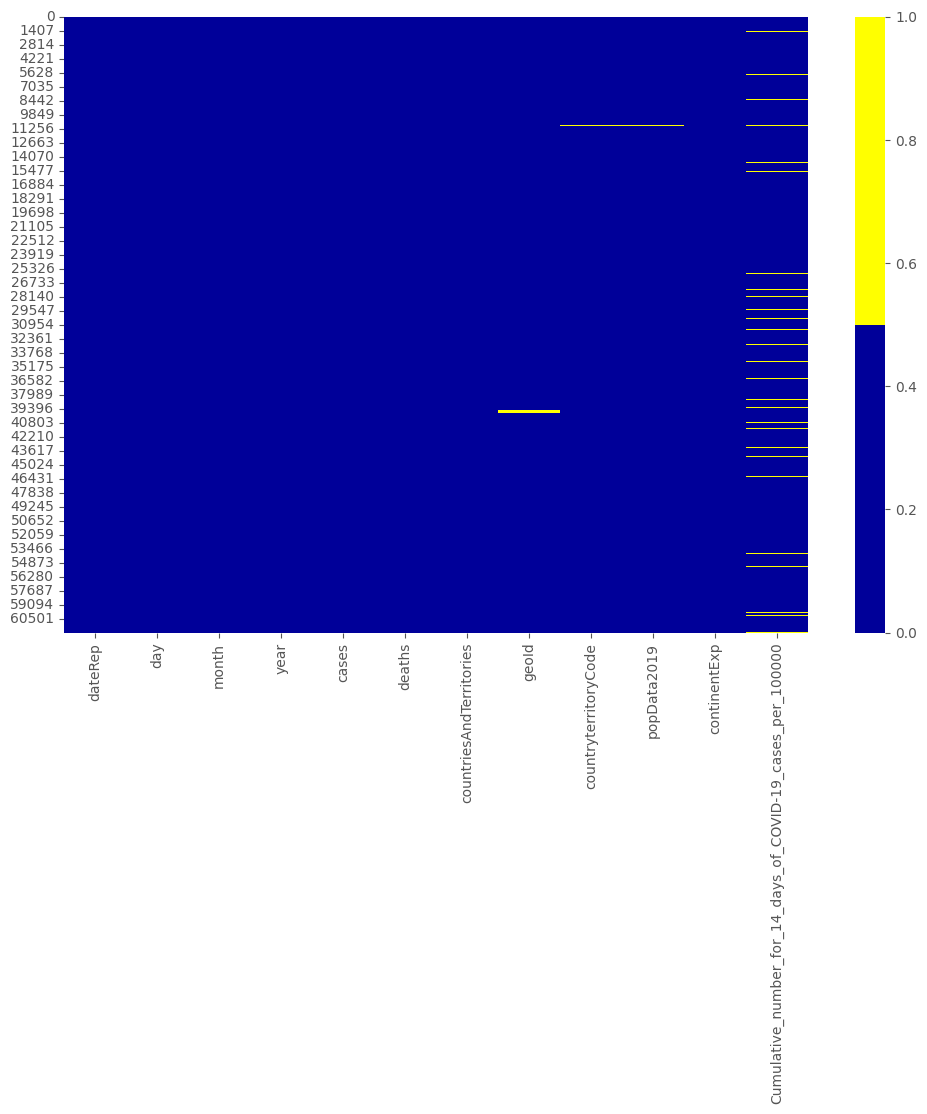

In [8]:
cols = df.columns[:12] # Toma las 12 columnas
colours = ['#000099', '#ffff00'] # Especifica los colores - amarillo es missing. azul contiene valores.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

El gráfico que figura  muestra los patrones de datos que faltan de las 12 características.
El eje horizontal muestra el nombre del atributo de entrada; el eje vertical muestra el número de observaciones/filas; el color amarillo representa los datos que faltan, mientras que el color azul, en caso contrario.
Vemos que faltan muchos datos en la columna *Cumulative_number_for_14_days_of_COVID-19_cases_per_100000* , pero tambien falta una parte de los datos *geoId*,*countryterritoryCode* y *popData2019*.


## 2.2. Missing Data Percentage List
Vamos a  hacer una lista de los % de datos que faltan para cada característica.

In [9]:
# Porcentaje (%) de missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

dateRep - 0%
day - 0%
month - 0%
year - 0%
cases - 0%
deaths - 0%
countriesAndTerritories - 0%
geoId - 0%
countryterritoryCode - 0%
popData2019 - 0%
continentExp - 0%
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000 - 5%


# 3. Outliers (Datos fuera de rango)

Los valores atípicos son datos que son distintivamente diferentes de otras observaciones.

## 3.1. Histograma /Box Plot

Para las características numéricas, vamos a usar un histograma y un diagrama de caja para detectar los valores atípicos.
A continuación se muestra el histograma del rasgo *month*.





<Axes: >

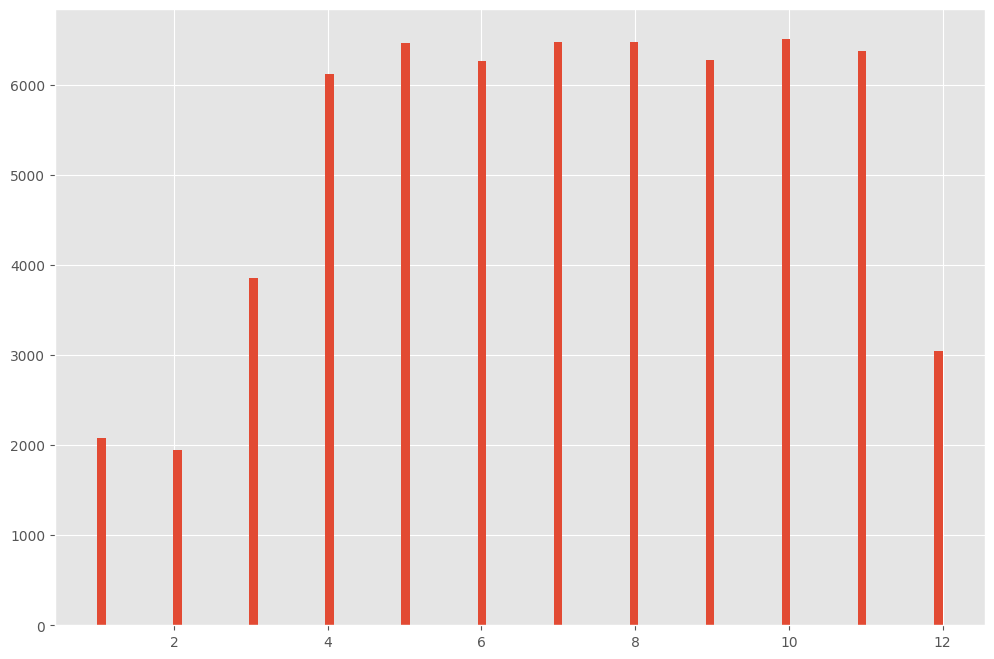

In [10]:
# Histograma del Mes.
df['month'].hist(bins=100)

<Axes: >

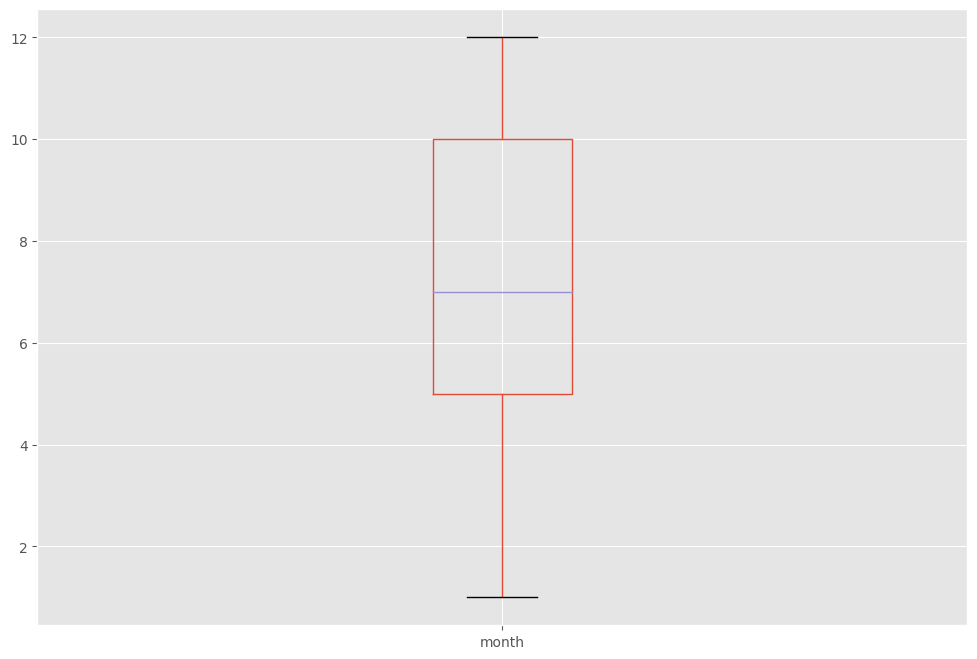

In [11]:
# box plot.
df.boxplot(column=['month'])

<Axes: >

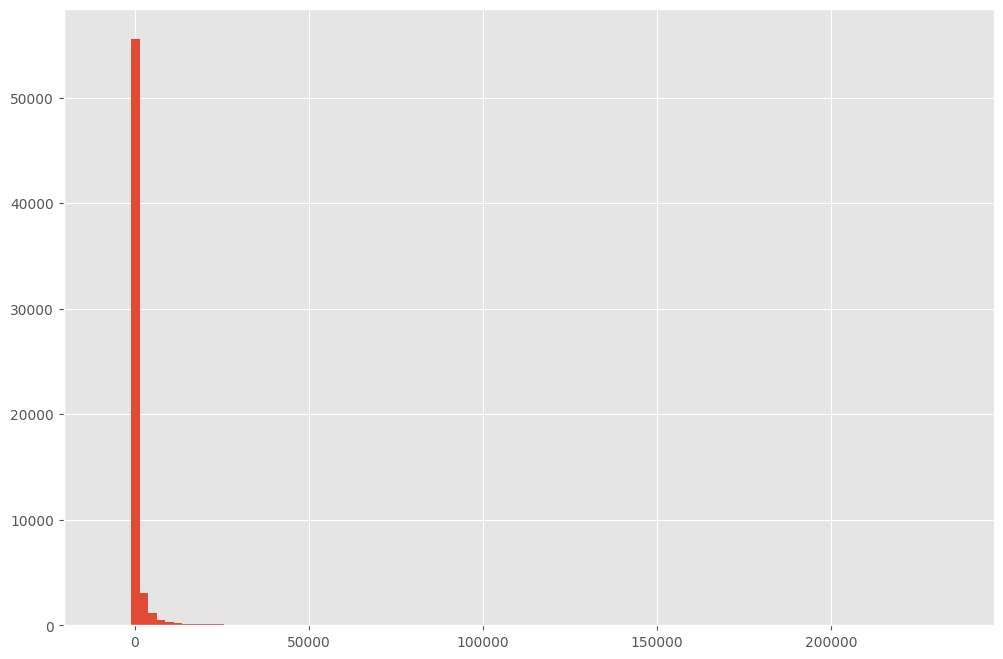

In [12]:
# Histograma del numero de casos.
df['cases'].hist(bins=100)

<Axes: >

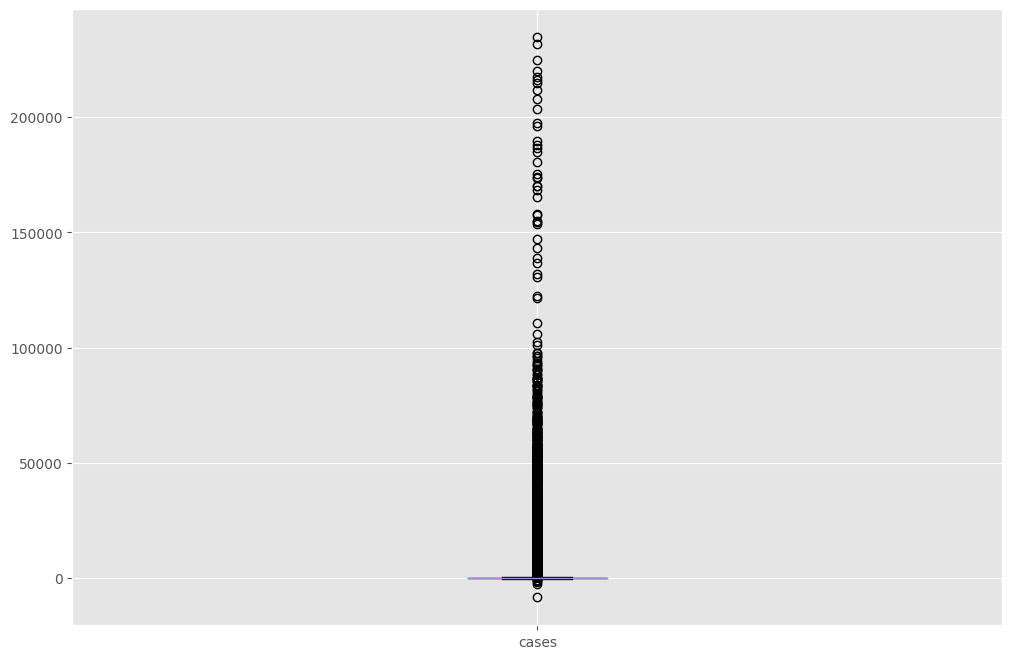

In [13]:
# box plot.
df.boxplot(column=['cases'])

<Axes: >

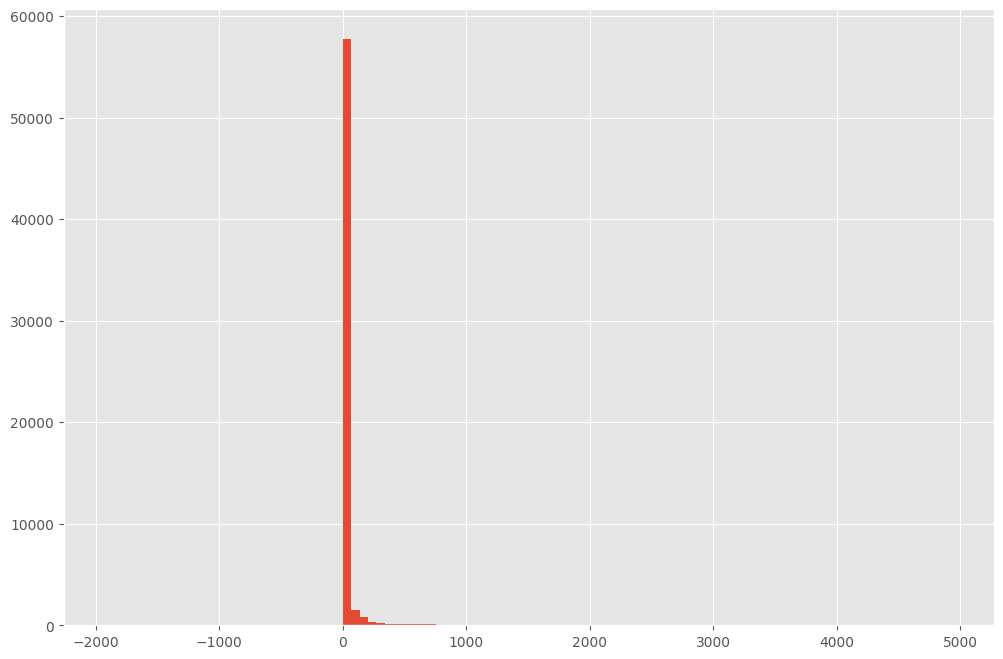

In [14]:
# Histograma de muertes.
df['deaths'].hist(bins=100)

<Axes: >

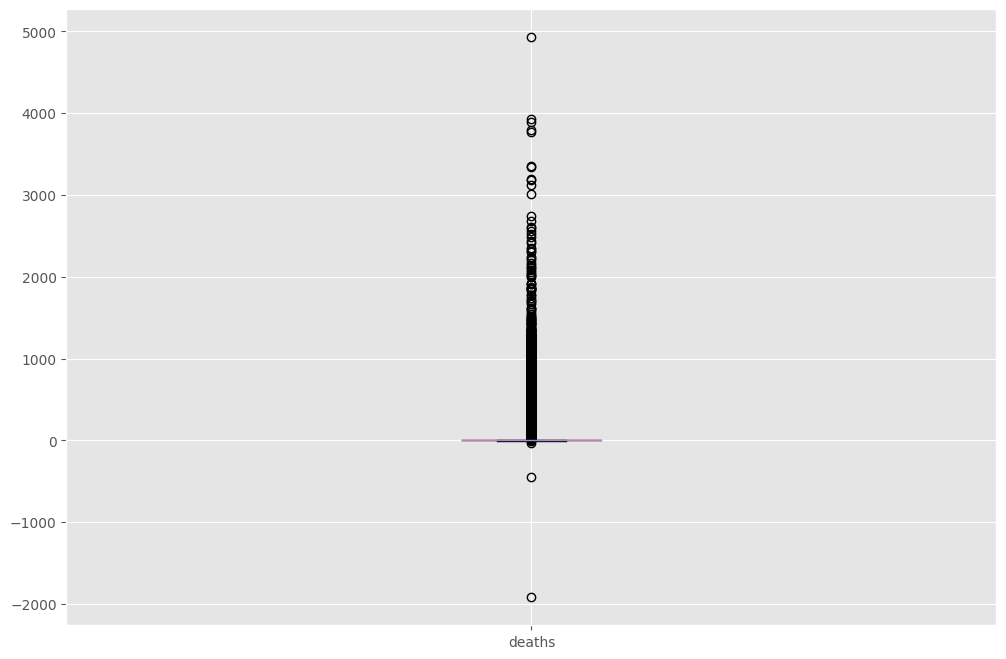

In [15]:
# box plot.
df.boxplot(column=['deaths'])

<Axes: >

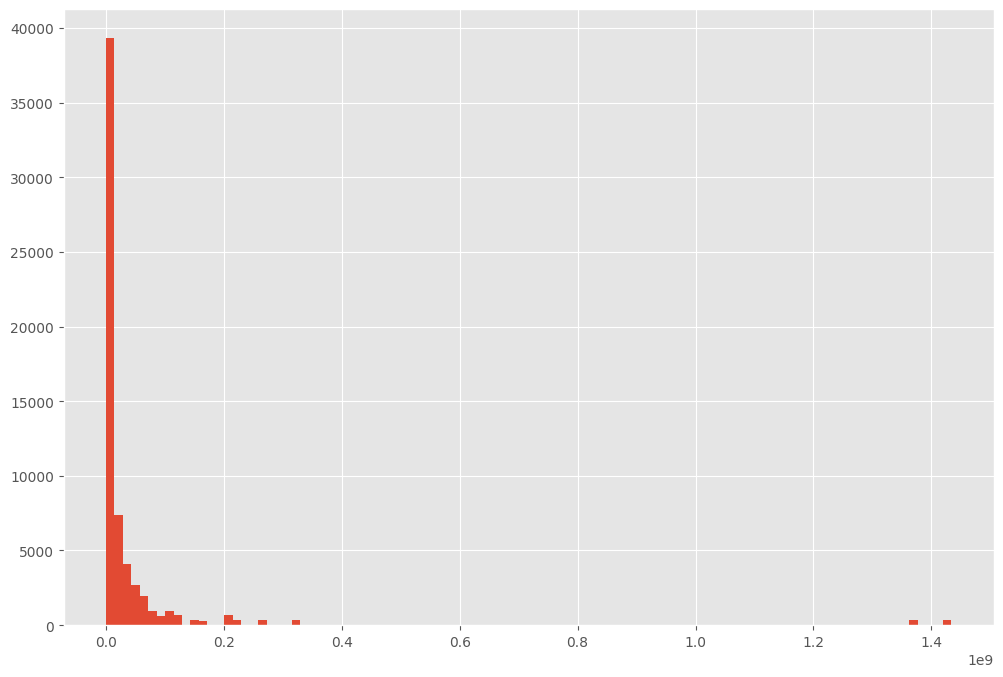

In [16]:
# Histograma de la poblacion del 2019.
df['popData2019'].hist(bins=100)

<Axes: >

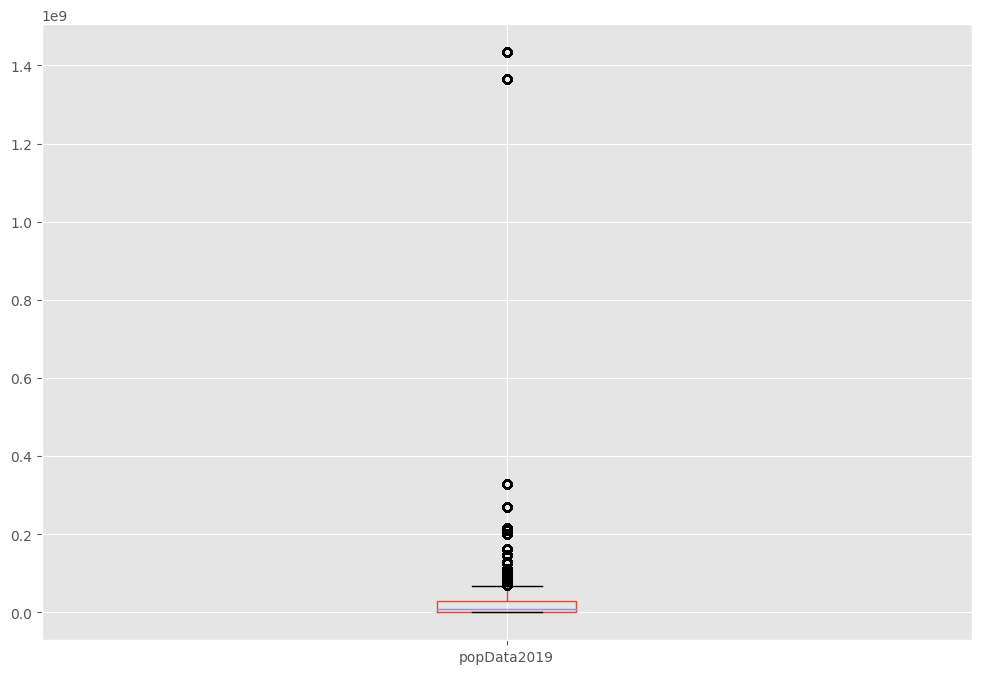

In [17]:
# box plot.
df.boxplot(column=['popData2019'])

<Axes: >

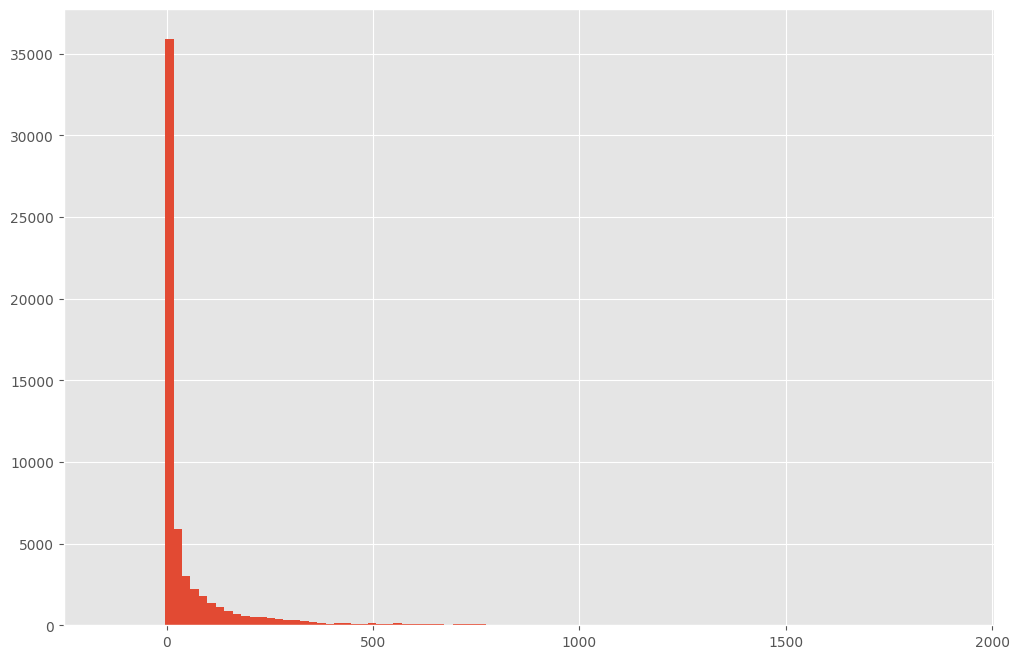

In [18]:
# Histograma de casos acumulados.
df['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'].hist(bins=100)

<Axes: >

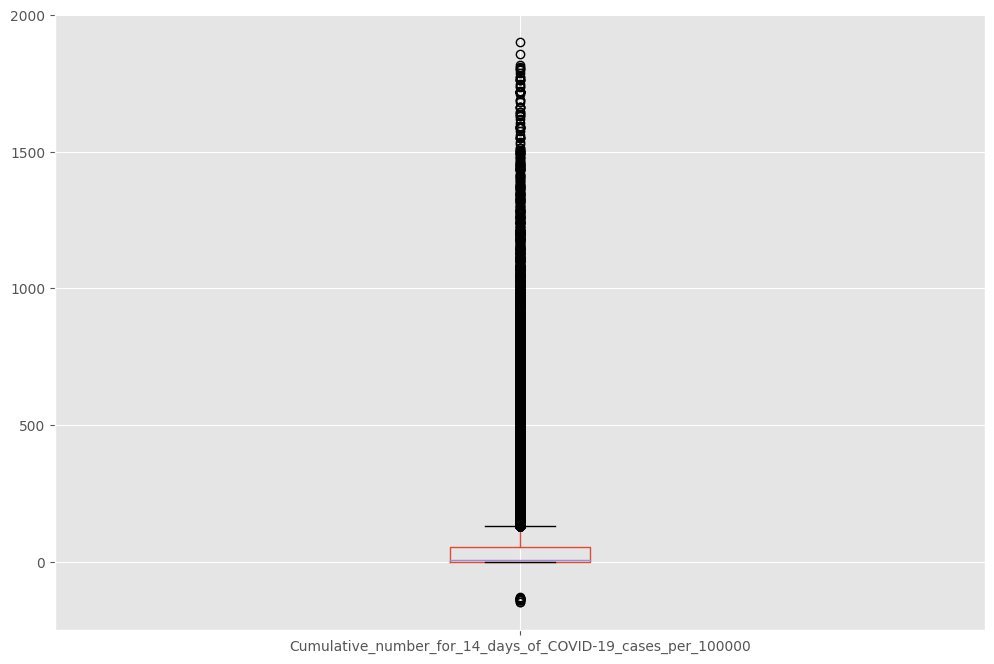

In [19]:
# box plot.
df.boxplot(column=['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'])

Para la mayoria de los casos podemos determinar que todos los valores estan dentro de un rango aceptable, con una gran parte en valores cercanos a cero, por lo que se considera el límite superior como un valor bajo. Sin embargo, son precisamente estos datos fuera del límite superior los que nos resultan más interesantes para el análisis, unicamente para **month** nos ha determinado unas cifras convenientes dentro del rango ya que esta entre 1-12.

Para los casos en que se salieron del limite inferior, es decir los que son menores a cero, se tomara el valor absoluto para corregir estos valores.

In [20]:
# Saca valor absoluto
df['cases']=abs(df['cases'])
df['deaths']=abs(df['deaths'])
df['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000']=abs(df['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'])

## 3.2. Bar Chart

Para la características categóricas como *continentExp*. Podemos usar un gráfico de barras para aprender sobre sus categorías y distribución:

<Axes: >

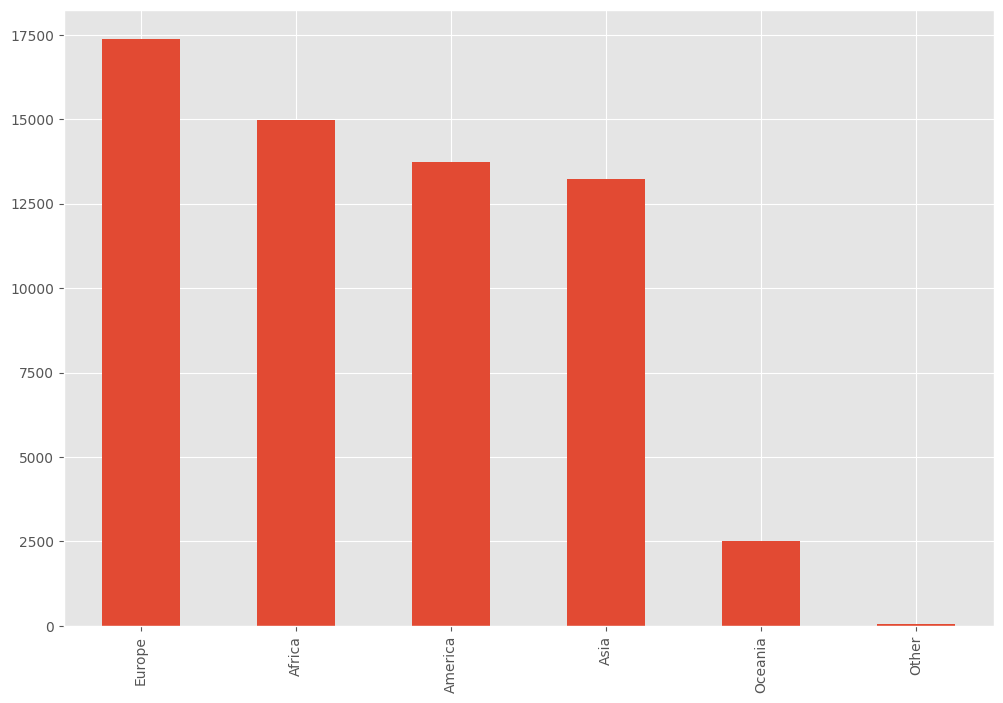

In [21]:
# bar chart -  Distribucion de la variable categorica continente
df['continentExp'].value_counts().plot.bar()

Como pudimos observar las caracteristicas que tienen un menor cantidad de categorias y se pueden distribuir en graficas de barras son: **continentExp**. Lo que nos permite extraer informacion importante.

# 4. Datos innecesarios

Después de todo el trabajo realizado para los datos que faltan y los valores atípicos, veamos los datos innecesarios, que son más sencillos.




## 4.1. Tipo innecesario: Duplicados

### En base a las características

Primero quitamos el identificador único del conjunto de datos. Luego creamos un conjunto de datos llamado *df2* eliminando los duplicados. Comparamos las formas de los dos conjuntos de datos (df y df2) para averiguar el número de filas duplicadas.

In [22]:
# Borramos duplicados
df2 = df.drop_duplicates()

# Verificamos si hay duplicados
print(df.shape)
print(df2.shape)

(61900, 12)
(61900, 12)


Se verifica que no existen duplicados.



In [24]:
# Se exporta a .csv
df.to_csv('Covid19_Proc.csv')